#### Audio Classification Data Preprocessing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
! pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install --upgrade librosa

Defaulting to user installation because normal site-packages is not writeable


In [4]:
print(librosa_audio_data)

[-0.00011485 -0.00017083 -0.00017736 ... -0.04609928 -0.04609471
 -0.05099387]


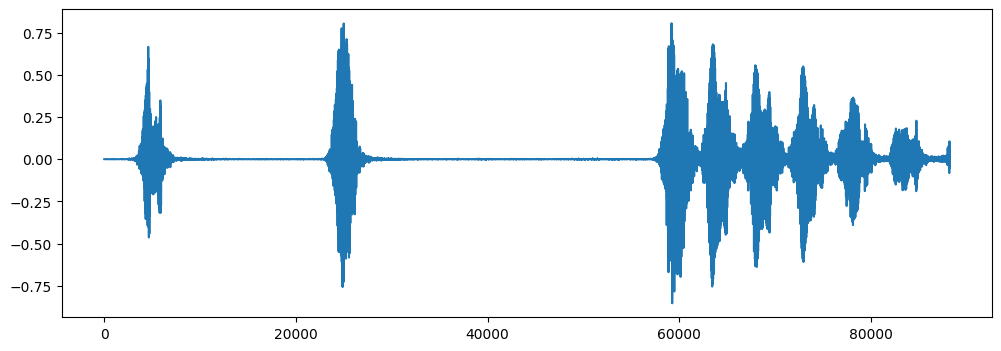

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [6]:
### Lets read with scipy
#scipy will present the data as it is

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio


array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

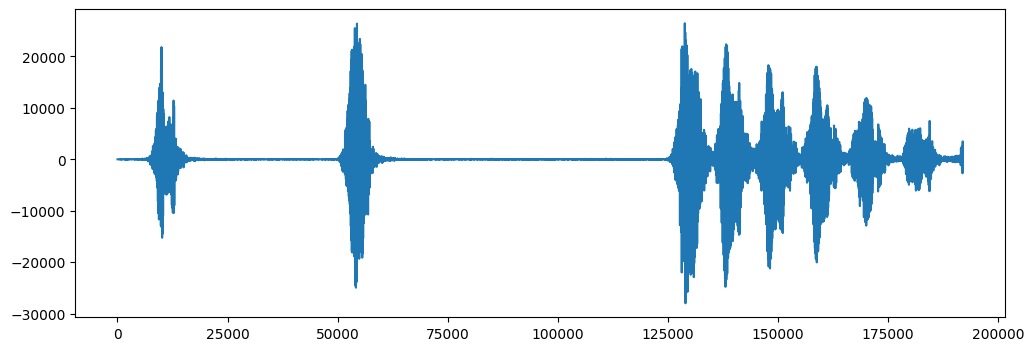

In [8]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.



The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope


MFCC has the characteristics of high accuracy and stable recognition. At the same time, advantages of MFCC including high-fidelity representation and stable recognition

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [10]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999226e+00,  1.6759441e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355560e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849548e+01],
       ...,
       [ 4.3309483e-01, -3.5408895e+00, -4.8356495e+00, ...,
        -5.2699118e+00, -1.2849241e-01,  7.5349283e-01],
       [ 4.4520700e-01, -3.2774832e+00, -4.6472917e+00, ...,
        -3.4224057e+00,  3.9007006e+00,  5.5314511e-01],
       [ 3.5697129e-01, -2.9899054e+00, -4.4125957e+00, ...,
        -2.6713324e+00,  2.7894549e+00,  1.4205611e-01]], dtype=float32)

In [11]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(8769)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8762,99830-1-3-0.wav,99830,0.840205,1.234051,1,11,13,Chirag
8763,99830-1-4-0.wav,99830,0.923241,1.351549,1,11,13,Chirag
8764,99830-1-5-0.wav,99830,0.696057,1.083077,1,11,13,Chirag
8765,99830-1-6-0.wav,99830,1.304943,1.607877,1,11,13,Chirag


In [12]:
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import numpy as np
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='soxr_hq') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [14]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

3554it [01:09, 44.64it/s]C:\Users\91773\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:258: UserWarning: n_fft=2048 is too large for input signal of length=1323
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"
8318it [02:29, 73.99it/s]C:\Users\91773\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:258: UserWarning: n_fft=2048 is too large for input signal of length=1103
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"
8327it [02:29, 77.70it/s]C:\Users\91773\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:258: UserWarning: n_fft=2048 is too large for input signal of length=1523
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"
8767it [02:36, 55.95it/s]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86224, -42.658787, 50.690277,...",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8767, 40)

In [18]:
y.shape

(8767,)

In [19]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import tensorflow  as tf
print(tf.__version__)

2.11.0


In [21]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-9.3053345e+01,  1.6973488e+01, -1.2441312e+01, ...,
        -4.9348080e-01, -2.8408728e+00,  1.2920443e+00],
       [-1.5447452e+02,  9.6937759e+01, -5.8436546e+01, ...,
         6.6603833e-01,  2.8853950e-01, -1.3032816e-02],
       [-7.1077324e+01,  2.6173710e+01, -2.8050711e+00, ...,
         3.1510882e+00,  2.2291319e+00, -1.3275180e+00],
       ...,
       [-4.2665570e+02,  9.1551338e+01,  4.1917033e+00, ...,
         9.7439998e-01,  5.1544541e-01,  9.1537476e-01],
       [-1.3725197e+02,  1.2426854e+02, -2.1599773e+01, ...,
         1.2500863e+00, -1.8957512e+00, -9.0149730e-01],
       [-4.1838937e+02,  2.0686234e+02,  7.2346177e+00, ...,
        -3.9861214e+00, -4.7178450e+00, -2.7892616e-01]], dtype=float32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train.shape

(7013, 40)

In [27]:
X_test.shape

(1754, 40)

In [28]:
y_train.shape

(7013, 15)

In [29]:
y_test.shape

(1754, 15)

### Model Creation

In [30]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
### No of classes
num_labels=y.shape[1]

In [33]:
num_labels

15

In [34]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [37]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
211/220 [===========================>..] - ETA: 0s - loss: 11.5630 - accuracy: 0.1096
Epoch 1: val_loss improved from inf to 2.63439, saving model to saved_models\audio_classification.hdf5
220/220 [==============================] - 3s 5ms/step - loss: 11.2662 - accuracy: 0.1101 - val_loss: 2.6344 - val_accuracy: 0.1237
Epoch 2/100
209/220 [===========================>..] - ETA: 0s - loss: 2.8284 - accuracy: 0.1080
Epoch 2: val_loss improved from 2.63439 to 2.54767, saving model to saved_models\audio_classification.hdf5
220/220 [==============================] - 1s 4ms/step - loss: 2.8183 - accuracy: 0.1072 - val_loss: 2.5477 - val_accuracy: 0.1180
Epoch 3/100
208/220 [===========================>..] - ETA: 0s - loss: 2.5693 - accuracy: 0.1172
Epoch 3: val_loss improved from 2.54767 to 2.47536, saving model to saved_models\audio_classification.hdf5
220/220 [==============================] - 1s 4ms/step - loss: 2.5720 - accuracy: 0.1171 - val_loss: 2.4754 - val_accuracy: 0.10

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from datetime import datetime

# Define a function to create and compile the model
def create_model(num_hidden_layers, units_per_layer, learning_rate, dropout_rate):
    model = Sequential()
    
    # Add input layer
    model.add(Dense(units_per_layer, input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    
    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(Dense(units_per_layer))
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))
    
    # Add output layer
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    
    # Compile the model with custom learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model

# Define hyperparameters to search over
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'units_per_layer': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Assuming X_train, y_train, X_test, y_test are defined

best_accuracy = 0
best_hyperparameters = None

for num_hidden_layers in param_grid['num_hidden_layers']:
    for units_per_layer in param_grid['units_per_layer']:
        for learning_rate in param_grid['learning_rate']:
            for dropout_rate in param_grid['dropout_rate']:
                print(f"Testing hyperparameters: num_hidden_layers={num_hidden_layers}, units_per_layer={units_per_layer}, learning_rate={learning_rate}, dropout_rate={dropout_rate}")
                
                model = create_model(num_hidden_layers, units_per_layer, learning_rate, dropout_rate)
                
                # Assuming you have X_train, y_train, X_test, y_test defined
                start = datetime.now()
                model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
                duration = datetime.now() - start
                
                test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
                
                print(f"Test Accuracy: {test_accuracy}, Time: {duration}")
                
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_hyperparameters = {
                        'num_hidden_layers': num_hidden_layers,
                        'units_per_layer': units_per_layer,
                        'learning_rate': learning_rate,
                        'dropout_rate': dropout_rate
                    }

print(f"Best Hyperparameters: {best_hyperparameters}, Best Accuracy: {best_accuracy}")


Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.001, dropout_rate=0.3
Test Accuracy: 0.8232611417770386, Time: 0:00:38.417470
Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.001, dropout_rate=0.5
Test Accuracy: 0.7189281582832336, Time: 0:00:37.868934
Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.001, dropout_rate=0.7
Test Accuracy: 0.5524515509605408, Time: 0:00:36.151352
Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.01, dropout_rate=0.3
Test Accuracy: 0.5091220140457153, Time: 0:00:46.388547
Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.01, dropout_rate=0.5
Test Accuracy: 0.3164196014404297, Time: 0:00:53.986126
Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.01, dropout_rate=0.7
Test Accuracy: 0.10547320544719696, Time: 0:00:44.456009
Testing hyperparameters: num_hidden_layers

KeyboardInterrupt: 

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from datetime import datetime

# Define the best hyperparameters
num_hidden_layers = 1
units_per_layer = 128
learning_rate = 0.001
dropout_rate = 0.3


model = Sequential()

# Add first layer
model.add(Dense(units_per_layer, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

# Add hidden layer (since num_hidden_layers = 1)
model.add(Dense(units_per_layer))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

# Add final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

# Training configuration
num_epochs = 100
num_batch_size = 32

# ModelCheckpoint for saving the best model
checkpointer = ModelCheckpoint(filepath='model/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

# Train the model
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start


print("Training completed in time: ", duration)


Epoch 1/100
201/220 [==========================>...] - ETA: 0s - loss: 7.9421 - accuracy: 0.1821
Epoch 1: val_loss improved from inf to 2.16905, saving model to model\audio_classification.hdf5
220/220 [==============================] - 2s 4ms/step - loss: 7.5039 - accuracy: 0.1859 - val_loss: 2.1690 - val_accuracy: 0.2719
Epoch 2/100
217/220 [============================>.] - ETA: 0s - loss: 2.3031 - accuracy: 0.2392
Epoch 2: val_loss improved from 2.16905 to 1.90504, saving model to model\audio_classification.hdf5
220/220 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.2396 - val_loss: 1.9050 - val_accuracy: 0.3335
Epoch 3/100
212/220 [===========================>..] - ETA: 0s - loss: 2.0357 - accuracy: 0.2880
Epoch 3: val_loss improved from 1.90504 to 1.77012, saving model to model\audio_classification.hdf5
220/220 [==============================] - 1s 3ms/step - loss: 2.0335 - accuracy: 0.2892 - val_loss: 1.7701 - val_accuracy: 0.3683
Epoch 4/100
211/220 

In [40]:
import pickle
from tensorflow.keras.models import load_model

# Assuming you have a Keras model saved as 'audio_classification.hdf5'
# Load the model
model = load_model('model/audio_classification.hdf5')

# Save the architecture
with open('model_architecture.pkl', 'wb') as arch_file:
    pickle.dump(model.to_json(), arch_file)

# Save the weights
model.save_weights('model_weights.h5')

In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8757126331329346


In [42]:
X_test[1]

array([-89.609856  , 138.54202   , -34.66755   ,  -6.325211  ,
       -14.328585  ,  -6.6653895 ,  -9.3626585 ,  -4.4089456 ,
       -13.62875   ,  -7.837764  ,  -9.734955  ,  -1.6937976 ,
        -4.138757  ,  -3.6724246 , -10.9405155 ,  -7.674461  ,
       -11.292069  ,  -2.1165285 ,  -6.9831605 ,  -0.4331562 ,
       -11.776561  ,  -7.823608  ,  -8.694304  ,   3.819956  ,
         5.5766864 ,  16.414688  ,   6.421837  ,   3.68199   ,
        -4.729585  ,   2.81644   ,   4.402446  ,   7.9418097 ,
         1.9626476 ,  -3.597658  ,  -6.426121  ,  -0.43179762,
         3.4978323 ,   3.5428407 ,  -0.72858226,  -3.1850307 ],
      dtype=float32)

In [43]:
model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


array([[8.2482854e-10, 9.2139990e-16, 7.7832614e-19, ..., 1.6534319e-05,
        4.0360722e-03, 7.7549659e-04],
       [3.1398189e-21, 6.8510323e-23, 4.6834196e-30, ..., 3.2690174e-15,
        6.2330720e-08, 6.0416081e-09],
       [2.5000310e-22, 1.4563612e-20, 2.4333337e-34, ..., 2.7937937e-11,
        3.4062844e-10, 9.1539359e-06],
       ...,
       [2.5826661e-04, 1.6534957e-06, 4.2374437e-10, ..., 9.5058749e-05,
        3.1740856e-03, 4.2146098e-02],
       [3.4385673e-07, 1.1530975e-13, 6.8351155e-20, ..., 5.0079951e-10,
        5.5749965e-06, 7.1514019e-06],
       [4.9861801e-15, 5.4924910e-27, 0.0000000e+00, ..., 6.2901748e-08,
        6.5500251e-11, 6.2708515e-12]], dtype=float32)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [44]:
import librosa
import numpy as np

# Assuming you have already loaded and compiled your model
# model = load_model('path_to_your_model.h5')

filename = r"UrbanSound8K\audio\fold8\4918-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='soxr_hq')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming `model` is already loaded and compiled

# model.prediction_classes is removed use .predict 
predicted_label = model.predict(mfccs_scaled_features)
# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
print(prediction_class)


[-3.9969299e+02  1.4192807e+02  3.6671585e+01 -3.1393843e+00
 -1.2362525e+01  1.1950687e+01  4.5774460e+00  2.0163059e+01
 -8.7723427e+00 -3.5556359e+00  2.2943330e+00  1.0002098e+01
 -1.3625075e+00  1.1708170e+01  2.3307431e-01  6.4198050e+00
 -5.7334733e+00  2.2980258e+00 -9.8207464e+00 -5.0982037e+00
 -5.5712056e+00  4.0016718e+00 -3.4604087e+00  3.1788473e+00
  4.2723479e+00  7.4597126e-01  4.7398405e+00  3.6501827e+00
 -3.4806538e+00 -2.6430140e+00 -4.3309932e+00 -6.9920073e+00
 -1.1306747e+00  4.5659781e+00 -2.0691345e+00  2.7307234e+00
  7.1136534e-01 -2.6324866e+00 -2.7680099e+00 -3.2751236e+00]
[[-3.9969299e+02  1.4192807e+02  3.6671585e+01 -3.1393843e+00
  -1.2362525e+01  1.1950687e+01  4.5774460e+00  2.0163059e+01
  -8.7723427e+00 -3.5556359e+00  2.2943330e+00  1.0002098e+01
  -1.3625075e+00  1.1708170e+01  2.3307431e-01  6.4198050e+00
  -5.7334733e+00  2.2980258e+00 -9.8207464e+00 -5.0982037e+00
  -5.5712056e+00  4.0016718e+00 -3.4604087e+00  3.1788473e+00
   4.2723479e+00 

In [45]:
! pip install gtts

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import librosa
import numpy as np
from gtts import gTTS
import os

# Load and process audio
filename = r"UrbanSound8K\audio\fold11\99820-1-6-0.wav"
audio, sample_rate = librosa.load(filename, res_type='soxr_hq')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print and reshape features
print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming `model` is already loaded and compiled

# Make a prediction
predicted_label = model.predict(mfccs_scaled_features)

# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

# Convert prediction to speech
tts = gTTS(text=f"The predicted class is {prediction_class}", lang='en')
tts.save("prediction.mp3")

# Play the audio
os.system("start prediction.mp3")


[-3.6247092e+02  1.3049196e+02 -1.9619326e+01  2.3387217e+01
 -1.0501050e+01 -1.3503122e+01 -1.0862971e+01 -6.7823467e+00
 -2.6007595e+01 -5.0588441e+00 -2.4421206e+01 -7.3502345e+00
 -4.5770087e+00 -9.0281048e+00  2.3806322e+00 -1.5240011e+01
 -1.8317255e+00 -5.1440253e+00 -6.9986424e+00 -6.2955947e+00
 -1.9922019e+00 -6.6716547e+00 -3.4453194e+00 -8.2462257e-01
 -3.0159409e+00  3.5300758e-01 -7.5880492e-01  2.8096324e-01
 -1.4296468e+00  2.0644855e+00  2.1514103e+00  1.0926043e+00
 -1.4075866e-01 -3.3047080e-01 -2.5518270e+00 -5.1808846e-01
 -9.6295333e-01 -7.1237320e-01 -2.2250617e-01 -1.1786476e+00]
[[-3.6247092e+02  1.3049196e+02 -1.9619326e+01  2.3387217e+01
  -1.0501050e+01 -1.3503122e+01 -1.0862971e+01 -6.7823467e+00
  -2.6007595e+01 -5.0588441e+00 -2.4421206e+01 -7.3502345e+00
  -4.5770087e+00 -9.0281048e+00  2.3806322e+00 -1.5240011e+01
  -1.8317255e+00 -5.1440253e+00 -6.9986424e+00 -6.2955947e+00
  -1.9922019e+00 -6.6716547e+00 -3.4453194e+00 -8.2462257e-01
  -3.0159409e+00 

0

In [53]:
! pip install sounddevice

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 199.7/199.7 kB 12.6 MB/s eta 0:00:00


In [40]:
import numpy as np
import sounddevice as sd
from gtts import gTTS
import os
from tensorflow.keras.models import load_model
import librosa

# Load your pre-trained model
model = load_model(r'saved_models\audio_classification.hdf5')  # Replace with the actual path

# Function to record audio
def record_audio(duration):
    audio = sd.rec(int(sr * duration), samplerate=sr, channels=1, dtype='int16')
    sd.wait()
    return audio.flatten()

# Define the sample rate (sr) for audio processing
sr = 44100  # You may need to adjust this based on your specific use case

# Record audio button
duration = 5  # Adjust the recording duration as needed
audio_data = record_audio(duration)
print("Audio recorded.")

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Make a prediction using your model
predicted_label = model.predict(mfccs_scaled_features)

# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

# Convert prediction to speech
tts = gTTS(text=f"The predicted class is {prediction_class}", lang='en')
tts.save("prediction.mp3")

# Play the audio
os.system("start prediction.mp3")


Audio recorded.


ParameterError: Audio data must be floating-point

In [61]:
! pip install plyer

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 142.3/142.3 kB 4.3 MB/s eta 0:00:00


In [63]:
from plyer import vibrator
def Vibrate():
    vibrator.vibrate()

In [68]:
! pip install pyautogui


Defaulting to user installation because normal site-packages is not writeable
  Using cached PyAutoGUI-0.9.54-py3-none-any.whl
  Using cached PyScreeze-0.1.29-py3-none-any.whl
  Using cached MouseInfo-0.1.3-py3-none-any.whl
  Using cached pyscreenshot-3.1-py3-none-any.whl (28 kB)
  Using cached mss-7.0.1-py3-none-any.whl (76 kB)


In [72]:
import pyautogui
import time

def vibrate_laptop(duration=1, key='space', interval=0.5):
    """
    Simulate a vibration effect on the laptop by repeatedly pressing a key.

    Parameters:
        duration (float): Total duration of the vibration effect in seconds.
        key (str): The key to simulate pressing (e.g., 'space', 'enter').
        interval (float): The time interval between key presses in seconds.
    """
    end_time = time.time() + duration

    while time.time() < end_time:
        pyautogui.press(key)
        time.sleep(interval)
        

AttributeError: module 'PIL.Image' has no attribute 'Resampling'

In [1]:
import speech_recognition as sr
import pyttsx3

listerner = sr.Recognizer()

with sr.Microphone() as source:
        print("start speaking")
        voice = listerner.listen(source)
        command = listerner.recognize_google(voice)
        command = command.lower()
        if 'saurav' in command:
            print(command)



AttributeError: Could not find PyAudio; check installation

Thank you ! 